In [1]:
import pandas as pd

In [29]:
# import Giant Bomb
gb = pd.read_csv("giantbomb/giantbomb_reviews.csv", encoding='utf-8')

In [30]:
# import IGN
colHeader = ['game','date','reviewer','link','review', 'platforms', 'score']
IGN = pd.read_csv('IGN/IGN_1.csv', names = colHeader)
IGN['site'] = 'IGN'
IGN['score_100'] = 10*IGN['score']

In [32]:
# import Game Spot
colHeader2 = ['reviewer', 'date', 'game', 'link', 'score', 'platforms', 'review']
gamespot = pd.read_csv('gamespot/GAMESPOT_UPDATED.csv', names = colHeader2)
gamespot['site'] = 'GameSpot'
gamespot['score_100'] = 10*gamespot['score']

In [33]:
# convert date columns to datetime
gamespot["date"] = pd.to_datetime(gamespot.date, dayfirst=True)
IGN["date"] = pd.to_datetime(IGN.date, dayfirst=True)
gb["date"] = pd.to_datetime(gb.date, dayfirst=False)

In [34]:
results = pd.concat([gb, IGN, gamespot], ignore_index=True)

In [35]:
results.to_csv('results.csv', encoding='utf-8', index=False)

In [36]:
results.shape

(1850, 9)

In [37]:
from bs4 import BeautifulSoup
import urllib2
import requests
import re
import os
import numpy as np

In [38]:
gb_means = gb
gb_means['review_length'] = np.nan

In [39]:
for index, row in gb_means.iterrows():
    gb_means['review_length'][index] = len(row['review'].split())

c:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [40]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
%matplotlib inline
from matplotlib import rcParams
# Set inline graph size and font size
rcParams['figure.figsize'] = (24, 24)
rcParams['font.size'] = 12
from pandas.tools.plotting import scatter_matrix
matplotlib.style.use('ggplot')

In [41]:
grouped = gb_means.groupby(['site', 'reviewer'])
calculated_means = grouped.mean()

In [42]:
results['review_length'] = np.nan
for index, row in results.iterrows():
    results.loc[index, 'review_length'] = len(row['review'].split())

In [43]:
# group by site theen reviewer
grouped = results.groupby(['site', 'reviewer'])
# calculate mean of each review's scores and review lengths
calculated_means = grouped.mean()
# find number or reviews per reviewer
grouped_size = grouped.size().order()

by_reviewer_summary = grouped['review_length'].agg([np.sum, np.mean, np.std])


In [44]:
# compute summary statistics on review length by reviewer
by_reviewer_summary = grouped['review_length'].agg([np.sum, np.mean, np.std])


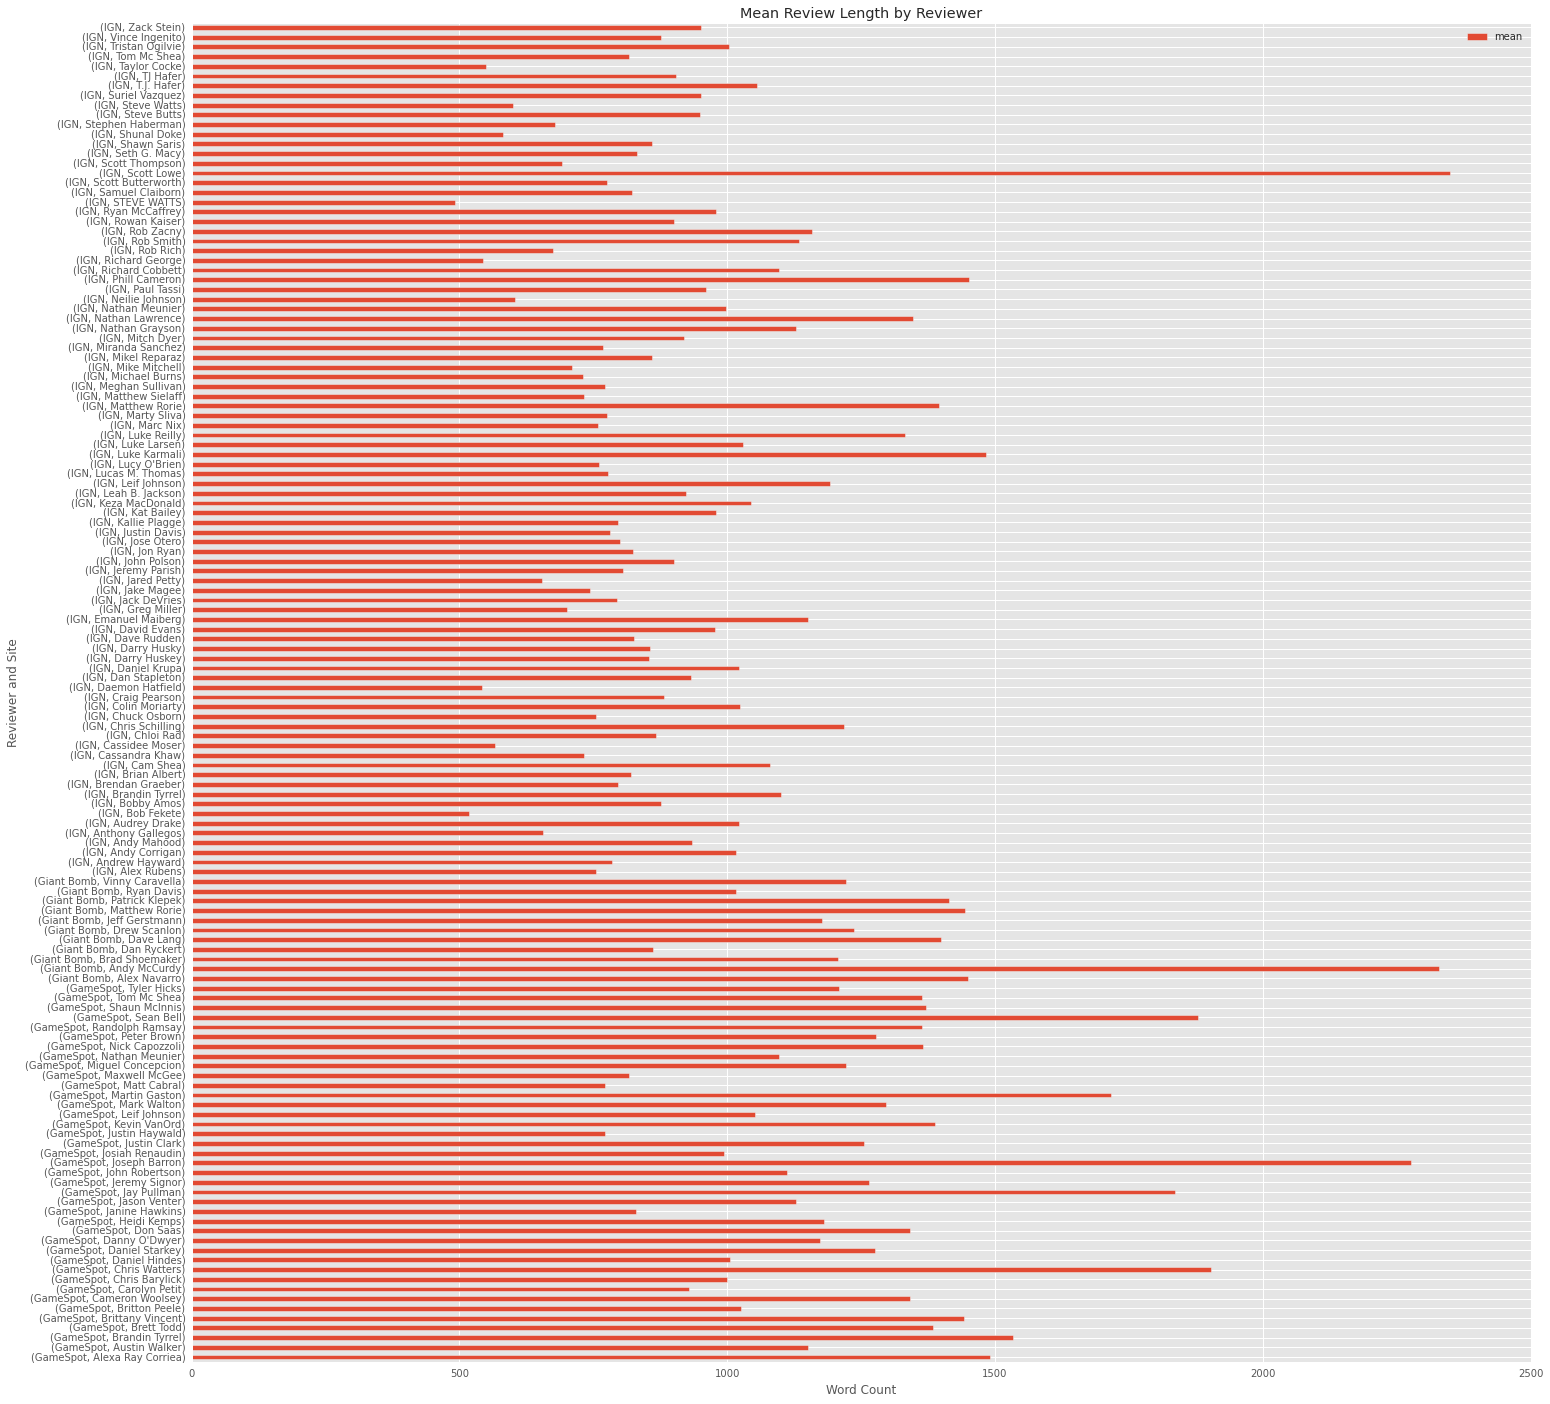

In [45]:
# bar chart by mean review length
by_reviewer_summary[['mean']].plot(kind='barh' )

plt.title("Mean Review Length by Reviewer") 
plt.xlabel("Word Count")
plt.ylabel("Reviewer and Site") 
plt.savefig('foo.png')

In [46]:
# group by site
by_site = results.groupby(['site'])
# summarize review length statistics sum, mean and standard deviation
by_site_summary = by_site['review_length'].agg([np.sum, np.mean, np.std])
print by_site_summary

               sum         mean         std
site                                       
GameSpot    524649  1249.164286  415.072647
Giant Bomb  800745  1215.091047  465.193875
IGN         695245   901.744488  334.284241


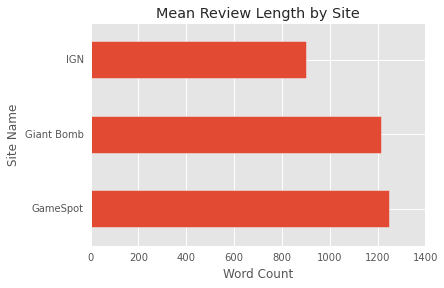

In [66]:
# bar chart by mean review length
by_site_summary['mean'].plot(kind='barh')

plt.title("Mean Review Length by Site") 
plt.xlabel("Word Count")
plt.ylabel("Site Name") 


In [48]:
calculated_means.to_csv('calculated_means.csv', encoding='utf-8', index=True)

In [49]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
%matplotlib inline
from pandas.tools.plotting import scatter_matrix
matplotlib.style.use('ggplot')

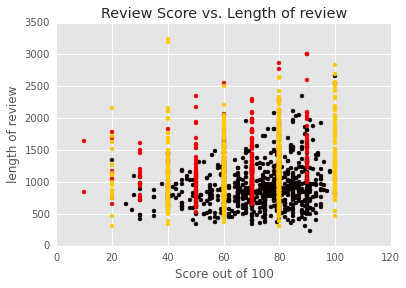

In [50]:
# get scatter of scores and review length
x = results['score_100']
y = results['review_length']

# Get unique names of
uniq = list(set(results['site']))

# Set the color map to match the number of species
z = range(1,len(uniq))
hot = plt.get_cmap('hot')
cNorm  = colors.Normalize(vmin=0, vmax=len(uniq))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=hot)

# Plot each species
for i in range(len(uniq)):
    indx = results['site'] == uniq[i]
    plt.scatter(x[indx], y[indx], s=15, color=scalarMap.to_rgba(i))

plt.xlabel('Score out of 100')
plt.ylabel('length of review')
plt.title('Review Score vs. Length of review')
plt.legend()
plt.show()
plt.savefig('foo.png')

In [51]:
grouped = results.groupby(['site', 'reviewer'])
calculated_means = grouped.mean().median()

In [52]:
sites = ['Giant Bomb', 'IGN', 'GameSpot']

In [57]:
groups = results.groupby(['site'])
groups_mean = groups.mean()

In [58]:
groups_mean

,score,score_100,review_length
site,,,
GameSpot,6.561905,65.619048,1249.164286
Giant Bomb,3.525038,70.500759,1215.091047
IGN,7.379377,73.793774,901.744488


In [59]:
groups.reviewer.nunique()

site
GameSpot      39
Giant Bomb    11
IGN           88
Name: reviewer, dtype: int64

In [60]:
groups.game.nunique()

site
GameSpot      387
Giant Bomb    639
IGN           710
Name: game, dtype: int64

In [67]:
by_site_summary = results['review_length'].agg([np.sum, np.mean, np.std])


AttributeError: 'Series' object has no attribute 'agg'

In [64]:
by_platform = results.groupby(['site', 'platforms'])
by_platform.mean()

score  \
site     platforms                                                      
GameSpot 3DS                                                 7.363636   
         3DS & Wii U                                         5.000000   
         PC                                                  6.268817   
         PC & 3DS & Wii U                                    7.000000   
         PC & PS3                                            5.000000   
         PC & PS4                                            7.000000   
         PC & Xbox 360 & PS3                                 8.000000   
         PC & Xbox One & PS4                                 8.333333   
         PC & iPhone/iPod                                    5.000000   
         PS3                                                 6.176471   
         PS3 & PlayStation Vita & PS4                        8.000000   
         PS3 & Xbox 360                                      6.000000   
         PS3 & Xbox 360 & PC                                 7.000000   
         PS4                                                 6.606557   
         PS4 & PC                                            8.000000   
         PS4 & PC & Xbox One                                 9.000000   
         PS4 & PS3 & PlayStation Vita                        9.000000   
         PS4 & PS3 & Xbox 360 & Xbox One                     6.000000   
         PS4 & PlayStation Vita                              8.000000   
         PS4 & PlayStation Vita & PS3                        8.000000   
         PS4 & Xbox One                                      7.000000   
         PlayStation Vita                                    6.625000   
         PlayStation Vita & PS3 & PS4 & PC                   6.000000   
         PlayStation Vita & PS4                              7.000000   
         Wii U                                               6.200000   
         Xbox 360                                            7.000000   
         Xbox 360 & PC                                       5.000000   
         Xbox 360 & PS3                                      6.333333   
         Xbox 360 & PS3 & PC                                 9.000000   
         Xbox One                                            6.833333   
...                                                               ...   
IGN      PlayStation 4, PC, PlayStation 3 and PlayStatio...  9.500000   
         PlayStation 4, PC, PlayStation 3, Xbox 360 and ...  2.000000   
         PlayStation 4, PlayStation 3 and Wii U              6.000000   
         PlayStation 4, Wii U, Xbox 360 and Xbox One         9.100000   
         PlayStation 4, Xbox 360 and Xbox One                9.100000   
         PlayStation 4, Xbox One and PC                      9.000000   
         PlayStation Vita                                    7.022857   
         PlayStation Vita and PlayStation 3                  8.500000   
         PlayStation Vita, Nintendo 3DS, PC, PlayStation...  7.400000   
         Wii                                                 7.700000   
         Wii U                                               7.583333   
         Wii U and Xbox 360                                  8.700000   
         Xbox 360                                            7.125000   
         Xbox 360 and PC                                     6.700000   
         Xbox 360 and PlayStation 3                          7.950000   
         Xbox 360 and Xbox One                               7.500000   
         Xbox 360, PC, PlayStation 3 and Wii U               5.400000   
         Xbox One                                            7.171111   
         Xbox One and PC                                     6.800000   
         Xbox One, PlayStation 3, PlayStation 4 and Xbox...  7.800000   
         Xbox One, PlayStation 3, PlayStation 4, PC and ...  9.100000   
         Xbox One, PlayStation 4 and PC                      5.900000   
         iPad                                    